## **Incheon port data Online-PCA**

Include artificial ouliter data

- Inputs: Time-serise data (i.e., GC, TT, Temp)
- Outputs: Outlier score

writteny by seungsab (2022.11.15)
Edited bt taemin (2023.07.25)

In [1]:
import pandas as pd
import numpy as np
import scipy.io
import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [36]:
def find_date(df_raw, yy, mon, day):
    for i in range(0,len(df_raw)):
        if df_raw.iloc[i,0].year == yy:
            if df_raw.iloc[i,0].month == mon: 
                if df_raw.iloc[i,0].day == day:
                    X = i
                    break
                else:
                    continue
    return X

In [37]:
currentPath = os.getcwd()

print(currentPath)

c:\Users\USER\Desktop\Robust_Outlier_detection\Xaas\20241010_KICT_항만인프라데이터


In [ ]:
df_raw = pd.read_excel('./Data/CG_1_sig1_12.xlsx')

point5 = find_date(df_raw, 2023, 10, 1)

df_raw.rename(columns = {'Time':'date'}, inplace=True)
# df_raw = pd.read_excel('data_11_months.xlsx')
# df_raw = df_raw.iloc[:,1:]S
# df_raw.rename(columns = {'Unnamed: 0':'date'}, inplace=True)

print(df_raw)
    
#plt.plot(df_PSD0.columns)

#plt.show()


TypeError: find_date() missing 1 required positional argument: 'day'

In [ ]:
# 월, 일(00시) 기준 인덱스 찾아주는 코드

df_raw['date'] = pd.to_datetime(df_raw['date'])

In [5]:
det_date1 = find_date(2022, 11, 1)
# det_date1 = 0

# 2022/10/1 00시 인덱스 찾기 테스트
print(det_date1)

4369


In [6]:
# TT_2 && TT_4 초기 데이터(8월말 ~ 9월) 삭제

df_raw_tt = df_raw.iloc[det_date1:,:]
df_raw_tt.index = pd.RangeIndex(len(df_raw_tt)) #index reset
df_raw_tt


,date,CG_1,CG_2,CG_3,CG_4,TT_1,TT_2,TT_3,TT_4,TC_1_Avg,TC_2_Avg,Batt_Volt_Avg,PTemp_C_Avg,waterlevel,CG_1
0,2022-11-01 00:00:00,3.346000,-0.052,3.110,-0.260,-0.025,-0.508,-0.002,-0.569,13.06,14.44,13.98,14.13,563,0.0
1,2022-11-01 00:10:00,3.348000,-0.055,3.112,-0.260,-0.025,-0.508,-0.002,-0.569,13.07,14.56,13.98,14.21,543,0.0
2,2022-11-01 00:20:00,3.351000,-0.057,3.114,-0.259,-0.026,-0.508,-0.003,-0.569,13.10,14.38,13.98,14.29,523,0.0
3,2022-11-01 00:30:00,3.354000,-0.059,3.115,-0.259,-0.026,-0.508,-0.003,-0.570,13.13,14.34,13.98,14.37,504,0.0
4,2022-11-01 00:40:00,3.357000,-0.061,3.117,-0.259,-0.026,-0.508,-0.003,-0.570,13.16,14.45,13.98,14.44,484,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51744,2023-10-31 23:10:00,5.581505,-0.081,2.144,-0.172,0.012,-0.099,0.041,-0.475,16.69,17.44,12.93,18.43,248,0.0
51745,2023-10-31 23:20:00,5.583505,-0.083,2.145,-0.172,0.011,-0.099,0.041,-0.475,16.69,17.40,12.94,18.40,227,0.0
51746,2023-10-31 23:30:00,5.586505,-0.085,2.146,-0.172,0.011,-0.099,0.041,-0.475,16.67,17.38,12.93,18.36,207,0.0
51747,2023-10-31 23:40:00,5.589505,-0.087,2.147,-0.172,0.011,-0.099,0.041,-0.475,16.66,17.39,12.93,18.33,188,0.0


In [33]:
# 월, 일(00시) 기준 인덱스 찾아주는 코드

df_raw_tt['date'] = pd.to_datetime(df_raw_tt['date'])

def find_date2(yy, mon, day):
  for i in range(0,len(df_raw_tt)):
    if df_raw_tt.iloc[i,0].year == yy:
      if df_raw_tt.iloc[i,0].month == mon: 
        if df_raw_tt.iloc[i,0].day == day:
          X = i
          break
        else:
          continue
  return X

In [8]:
# Date Label
point1 = find_date(2022, 11, 1)
point2 = find_date(2023, 1, 1)
point3 = find_date(2023, 3, 1)
point4 = find_date(2023, 5, 1)
point5 = find_date(2023, 7, 1)

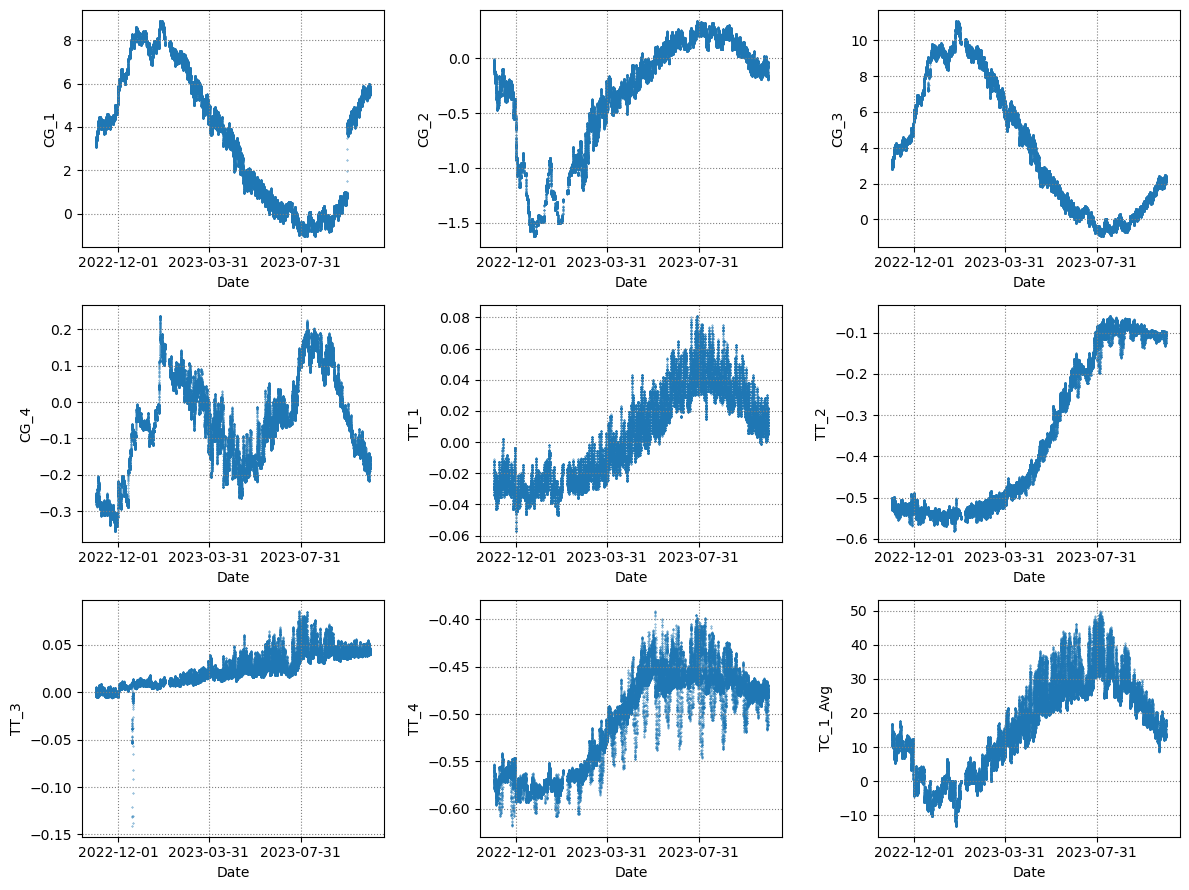

In [9]:
plt.figure(figsize=(12, 9))

for i in range(1,10):

  plt.subplot(3,3,i)
  plt.scatter(df_raw_tt.iloc[:,0],df_raw_tt.iloc[:,i], s=0.1)
  plt.xlabel('Date')
  plt.ylabel(df_raw_tt.columns[i])
  plt.xticks([df_raw_tt.iloc[point1, 0], df_raw_tt.iloc[point3, 0], df_raw_tt.iloc[point5, 0]])
  plt.grid(True, linestyle=':', color='gray')

plt.tight_layout()

plt.show()

In [10]:
# Training 부분 만들기 (index1 ~ index 2)
index1 = find_date2(2022, 11, 1)
index2 = find_date2(2023, 1, 1)

print(index1)
print(index2)

0
8784


In [11]:
outpoint = pd.DataFrame(columns=['data'])

CA = 1

if CA == 1:
    outpoint.loc[0] = find_date2(2023,5,1)
#     outpoint.loc[1] = find_date2(2023,6,1)
else:
    outpoint.loc[0] = find_date2(2023,5,1)


print(outpoint)

    data
0  25253


In [12]:
# df_raw_tt 행렬의 행 개수를 확인하여 행렬 생성
num_rows = df_raw_tt.shape[0]
df_label0 = pd.DataFrame(np.ones((num_rows, 1)), columns=['label'])

df_label0.iloc[index1:index2, :] = 0

print(df_label0)



       label
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
...      ...
51744    1.0
51745    1.0
51746    1.0
51747    1.0
51748    1.0

[51749 rows x 1 columns]


In [13]:
# select_columns = [1, 9]

if CA == 1:
    select_columns = [1, 2, 5, 6, 9]
else:
    select_columns = [3, 4, 7, 8, 9]

df_input = df_raw_tt.iloc[:, select_columns]

df_input

,CG_1,CG_2,TT_1,TT_2,TC_1_Avg
0,3.346000,-0.052,-0.025,-0.508,13.06
1,3.348000,-0.055,-0.025,-0.508,13.07
2,3.351000,-0.057,-0.026,-0.508,13.10
3,3.354000,-0.059,-0.026,-0.508,13.13
4,3.357000,-0.061,-0.026,-0.508,13.16
...,...,...,...,...,...
51744,5.581505,-0.081,0.012,-0.099,16.69
51745,5.583505,-0.083,0.011,-0.099,16.69
51746,5.586505,-0.085,0.011,-0.099,16.67
51747,5.589505,-0.087,0.011,-0.099,16.66


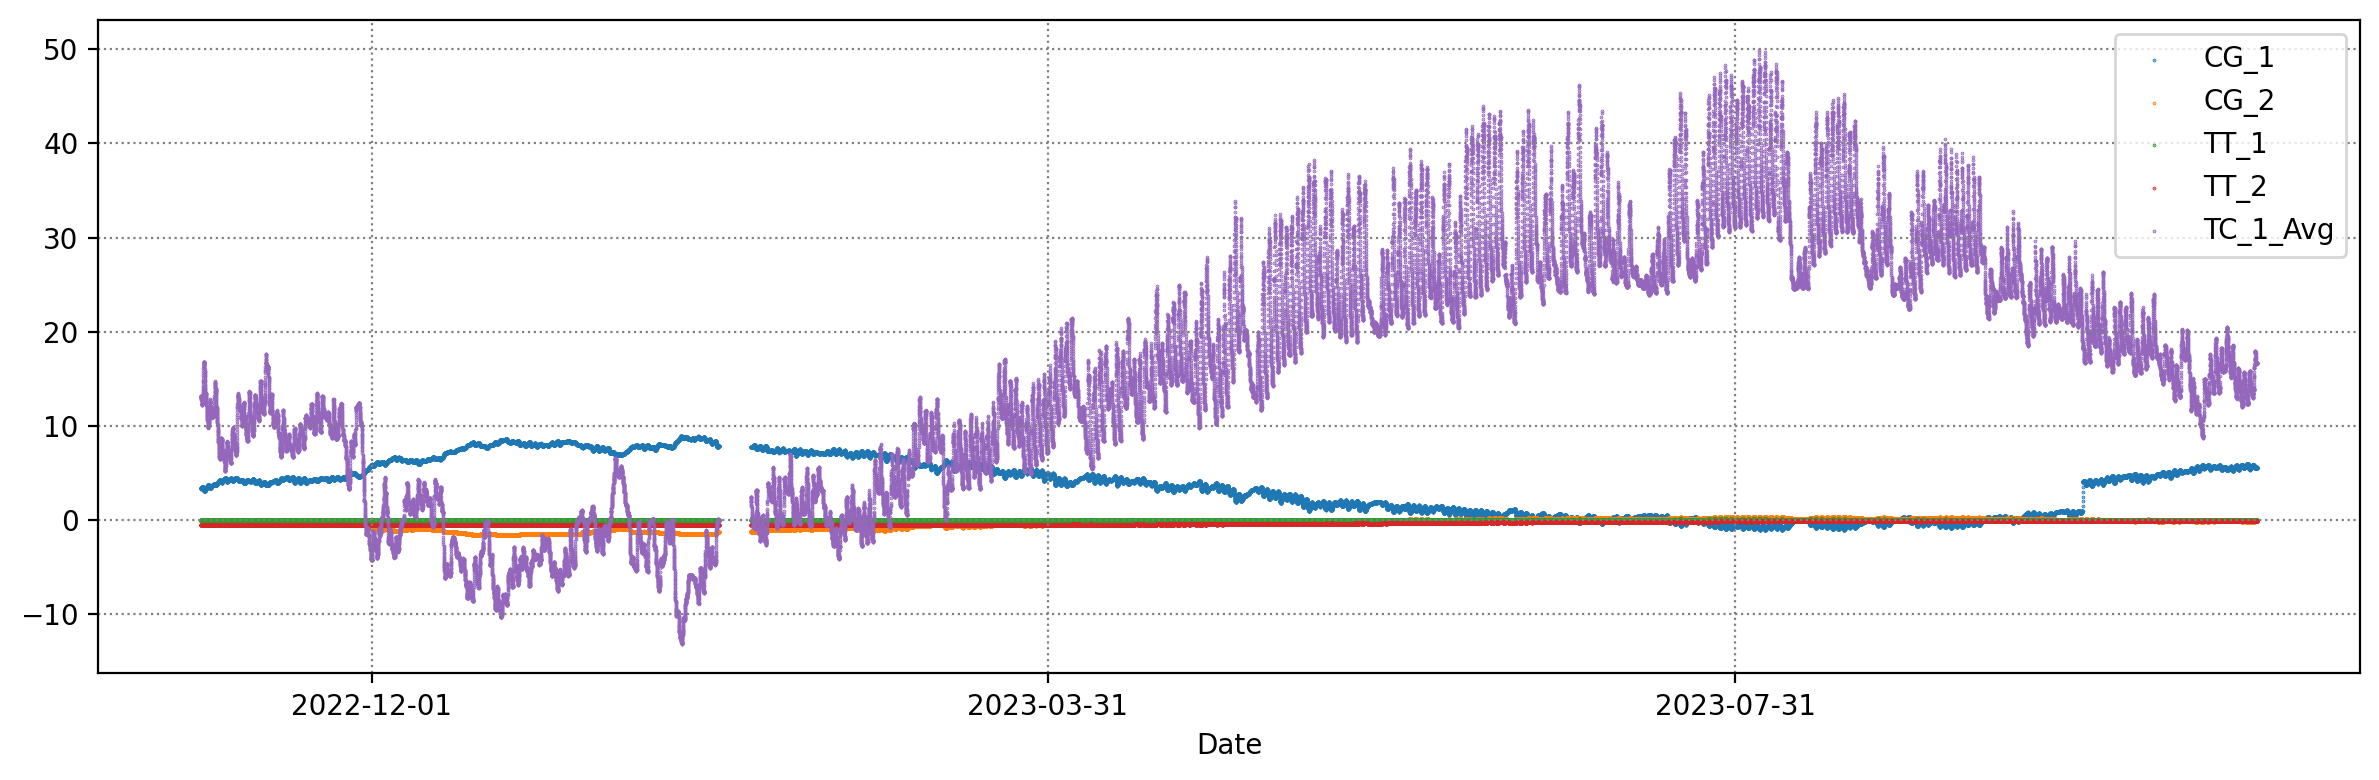

In [25]:
plt.figure(figsize=(12, 4), dpi = 200)

for i in range(df_input.shape[1]):
    plt.scatter(df_raw_tt.iloc[:, 0], df_input.iloc[:,i], s=0.1, label = df_input.columns[i])
    plt.xlabel('Date')
    plt.xticks([df_raw_tt.iloc[point1, 0], df_raw_tt.iloc[point3, 0], df_raw_tt.iloc[point5, 0]])
    plt.grid(True, linestyle=':', color='gray')

plt.tight_layout()
plt.legend()
plt.show()

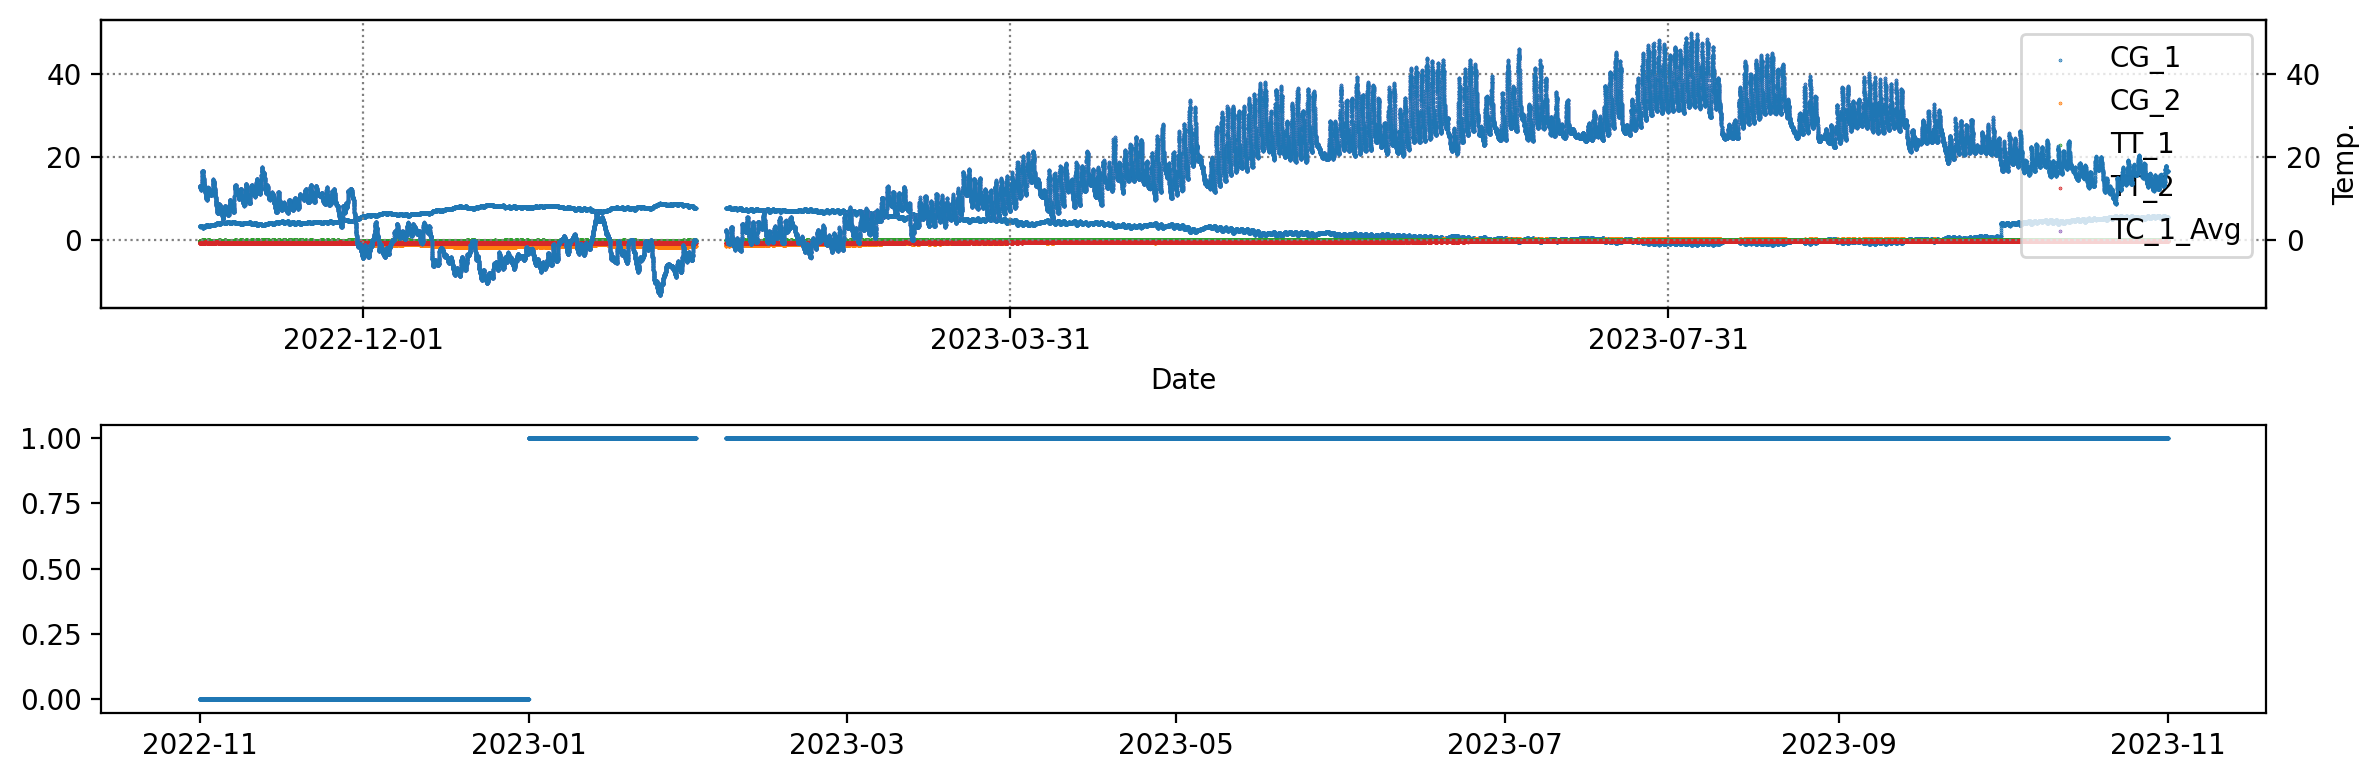

In [32]:
fig, axs = plt.subplots(2, 1, figsize=(12, 4), dpi = 200)

axs[0].set_xticks([df_raw_tt.iloc[point1, 0], df_raw_tt.iloc[point3, 0], df_raw_tt.iloc[point5, 0]])
for i in range(df_input.shape[1]):
    axs[0].scatter(df_raw_tt.iloc[:, 0], df_input.iloc[:,i], s=0.1, label = df_input.columns[i])
    if df_input.columns[i] in ['TC_1_Avg']:
        ax2 = axs[0].twinx()
        ax2.scatter(df_raw_tt.iloc[:, 0], df_input.iloc[:,i], s=0.1, label = df_input.columns[i])
        ax2.set_xticks([df_raw_tt.iloc[point1, 0], df_raw_tt.iloc[point3, 0], df_raw_tt.iloc[point5, 0]])
        ax2.set_ylabel('Temp.')

axs[0].grid(True, linestyle=':', color='gray')
axs[0].set_xlabel('Date')
axs[0].legend()

axs[1].scatter(df_raw_tt.iloc[:, 0], df_label0.iloc[:, 0], s=0.1)

plt.tight_layout()
plt.show()

#### **Step #2: Split Train and Test datasets**

In [ ]:
def run_all(train_ratio, df_label0, outpoint):
# Normal data
    bool_normal = (df_label0['label'] == 0)
    ind_train = int(df_input[bool_normal].shape[0] * train_ratio)

    # Split train and test datasets
    Xtrain, Ytrain = df_input.iloc[:ind_train, :], df_label0[:ind_train]
    Xvalid, Yvalid = df_input.iloc[ind_train:df_input[bool_normal].shape[0], :], df_label0[ind_train:df_input[bool_normal].shape[0]]
    Xtest, Ytest = df_input.iloc[df_input[bool_normal].shape[0]:, :], df_label0[df_input[bool_normal].shape[0]:]

    # Plotting
    plt.figure(figsize=(10, 8), dpi=200)
    plt.scatter(Ytrain.index, Ytrain.values, c='b', label='Train')
    plt.scatter(Yvalid.index, Yvalid.values, c='g', label='Valid')
    plt.scatter(Ytest.index, Ytest.values, c='r', label='Test')
    plt.grid(ls=':', color='gray')
    plt.xlabel('# Time Index')
    plt.ylabel('Train, Valid, Test')
    plt.legend()
    plt.show()

    # Define train and test data
    Xtrain_ = Xtrain.values
    Xvalid_ = Xvalid.values
    Xtest_ = Xtest.values

    from Utils.SS_Anomaly_Online_learning_out import pca_online

    anomaly_setting = {
        "method_Ncomp": 'eigengap',  # 'CPV' // 'eigengap'
        "alpha": 0.9999,
        "cutoff": 0.95,
        "component_use": 'minor',  # 'major' // 'minor'
        "method_thresh": 'threhold_from_Gaussian',  # percentile
        "gmm_run": True,  # True // False
        "score_type" : 'SPE' #SPE(Q) or else(t2)
    }

    Anomaly_detector = pca_online(**anomaly_setting)
    Anomaly_detector.fit_initial_pca(Xtrain_)

    for ind, x in enumerate(Xvalid_):
        print(f'Valid: {ind} // {Xvalid_.shape[0]}', end='\r')
        Xnew = x.reshape(1, -1)
        Anomaly_detector.fit_online_pca(Xnew)

    for ind, x in enumerate(Xtest_):
        print(f'Test: {ind} // {Xtest_.shape[0]}', end='\r')
        Xnew = x.reshape(1, -1)
        Anomaly_detector.fit_online_pca(Xnew)

    Anomaly_detector.plot_result(f'Training Ratio : {train_ratio * 100} %', df_label0, outpoint)



In [ ]:
train_ratio = 0.8
run_all(train_ratio, df_label0, outpoint)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))

# 전체 데이터 플롯
plt.subplot(3, 3, 1)
plt.plot(df_input.iloc[:, 0], label='CG1')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 2)
plt.plot(df_input.iloc[:, 1], label='CG2')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 3)
plt.plot(df_input.iloc[:, 2], label='CG3')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 4)
plt.plot(df_input.iloc[:, 3], label='CG4')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 5)
plt.plot(df_input.iloc[:, 4], label='TT1')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 6)
plt.plot(df_input.iloc[:, 5], label='TT2')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 7)
plt.plot(df_input.iloc[:, 6], label='TT3')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 8)
plt.plot(df_input.iloc[:, 7], label='TT4')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 9)
plt.plot(df_input.iloc[:, 8], label='TC1')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
# plt.subplot(1, 3, 3)
# plt.plot(df_input.iloc[:, 2], label='TT1')
# plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
# plt.xlabel('Time Index')
# plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))

# 전체 데이터 플롯
plt.subplot(2, 2, 1)
plt.plot(df_input.iloc[:, 0], label='TT1')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(df_input.iloc[:, 1], label='TT2')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(df_input.iloc[:, 2], label='TC1')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(df_input.iloc[:, 3], label='TC2')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()


plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))

# 전체 데이터 플롯
for i, column_name in enumerate(df_input.columns):
    plt.subplot(2, 3, i+1)
    plt.plot(df_input.iloc[:, i], label=column_name)
    if isinstance(outpoint, pd.DataFrame):
        for _, row in outpoint.iterrows():
            plt.axvline(x=row['data'], color='r', linestyle='--', linewidth=1)
    else:
        plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
    plt.xlabel('Time Index')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

# 전체 데이터 플롯
for i, column_name in enumerate(df_input.columns):
    plt.subplot(1, 5, i+1)
    plt.plot(df_input.iloc[:, i], label=column_name)
    for _, row in outpoint.iterrows():
        plt.axvline(x=row['data'], color='r', linestyle='--', linewidth=1)
    plt.xlabel('Time Index')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
column_labels = df_input.columns.tolist()

plt.figure(figsize = (4,4))
plt.scatter(df_input.iloc[:index2, 0],df_input.iloc[:index2, 1], color ='r')
plt.scatter(df_input.iloc[index2:, 0],df_input.iloc[index2:, 1], color ='b')
plt.legend(labels=['Initial', 'Test'])
plt.xlabel(column_labels[0])
plt.ylabel(column_labels[1])
plt.show()



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = {
    'feature1': df_input.iloc[:,0],
    'feature2': df_input.iloc[:,1]
}

data_df = pd.DataFrame(data)

# 데이터 스케일링 (평균 0, 분산 1로 스케일링)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_df.iloc[:, :2])

# PCA 수행
pca = PCA(n_components=2)
pc_scores = pca.fit_transform(scaled_data)

# 주성분 PC1의 변동성 확인
print("PC1 explained variance ratio:", pca.explained_variance_ratio_[0])

# 결과 시각화
plt.figure(figsize=(6, 6))
plt.scatter(pc_scores[:, 0], pc_scores[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Result')
plt.show()